In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

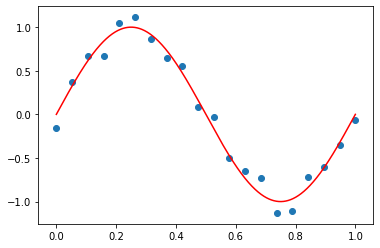

In [9]:
data_size = 20
x = np.linspace(0,1,data_size)
noise = np.random.uniform(low=-1.0,high=1.0,size=data_size)*0.2
y=np.sin(2.0*np.pi*x) + noise
plt.scatter(x,y)
x_line = np.linspace(0,1,1000)
sin_x = np.sin(2.0*np.pi*x_line)

plt.plot(x_line,sin_x,c ='red')

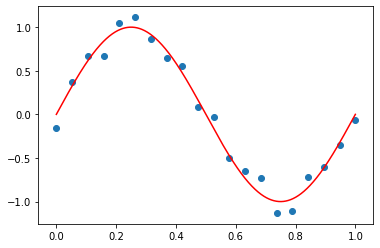

In [11]:
def plt_sin():
    plt.scatter(x,y)
    plt.plot(x_line,sin_x,c='red')

plt_sin()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(x.reshape(-1,1),y)

ValueError: Found input variables with inconsistent numbers of samples: [52624, 506]

In [14]:
lin_reg.intercept_,lin_reg.coef_

(0.8017339275840534, array([-1.60487121]))

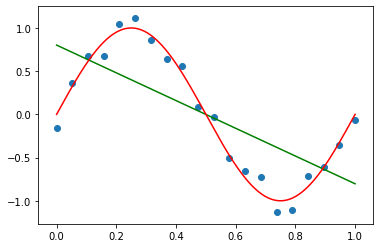

In [18]:
plt.plot(x_line,lin_reg.intercept_+lin_reg.coef_*x_line,c='green')
plt_sin()

In [25]:
x_2=x**2
x_new = np.concatenate([x.reshape(-1,1),x_2.reshape(-1,1)],axis=1)

In [27]:
x_new

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [28]:
lin_reg_2 = LinearRegression().fit(x_new,y)
lin_reg_2.intercept_,lin_reg_2.coef_

(0.747796652959522, array([-1.26326847, -0.34160274]))

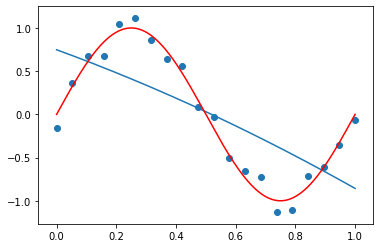

In [31]:
plt.plot(x_line,lin_reg_2.intercept_ + lin_reg_2.coef_[0]*x_line + lin_reg_2.coef_[1]*x_line**2)
plt_sin()

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly=PolynomialFeatures(degree=3)
poly.fit(x.reshape(-1,1))
x_poly_3 = poly.transform(x.reshape(-1,1))
x_poly_3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

lin_reg_3 = LinearRegression().fit(x_poly_3,y)
x_line_poly_3 =  poly.fit_transform(x_line.reshape(-1,1))
plt.plot(x_line,lin_reg_3.predict(x_line_poly_3))
plt_sin()

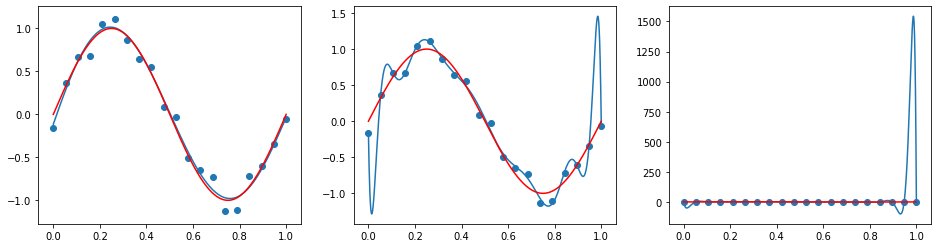

In [43]:
fig,axes = plt.subplots(1,3,figsize=(16,4))
for degree,ax in zip([5,15,25],axes):
    poly=PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression().fit(x_poly,y)
    x_line_poly=  poly.fit_transform(x_line.reshape(-1,1))
    ax.plot(x_line,lin_reg.predict(x_line_poly))
    ax.scatter(x,y)
    ax.plot(x_line,sin_x,c='red')
    
    
    
    

In [4]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
x,y = mglearn.datasets.load_extended_boston()

In [10]:
x.shape

(506, 104)

In [13]:
y.shape

(506,)

In [16]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

In [28]:
df_x
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(x_train,y_train)

In [60]:
lin_reg.intercept_,lin_reg.coef_

(30.934563673637626,
 array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
        -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
         2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
        -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
         1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
         5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
        -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
        -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
        -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
         6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
        -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
        -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
        -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868

In [61]:
print(round(lin_reg.score(x_train,y_train),3))
print(round(lin_reg.score(x_test,y_test),3))

0.952
0.607


In [62]:
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge().fit(x_train,y_train)

In [63]:
def print_score(model):
    print(round(model.score(x_train,y_train),3))
    print(round(model.score(x_test,y_test),3))
    

In [65]:
print_score(ridge)

0.886
0.753


In [68]:
ridge_10 = Ridge(alpha=10).fit(x_train,y_train)
print_score(ridge_10)

0.788
0.636


In [70]:
ridge_01 = Ridge(alpha=0.1).fit(x_train,y_train)
print_score(ridge_01)

0.928
0.772


In [74]:
coefficients = pd.DataFrame({"lin_reg":lin_reg.coef_,"ridge":ridge.coef_,'ridge10':ridge_10.coef_,"ridge_01":ridge_01.coef_})
coefficients

,lin_reg,ridge,ridge10,ridge_01
0,-412.710947,-1.413684,-0.811610,-2.333007
1,-52.243207,-1.556619,0.647609,-5.441929
2,-131.898815,-1.465434,-0.809783,-6.128655
3,-12.004136,-0.126616,0.311335,-0.778525
4,-15.510713,-0.079119,-0.684624,1.291530
...,...,...,...,...
99,35.361714,-2.361124,-1.769550,-0.559662
100,11.955343,0.043467,-2.036371,4.947479
101,0.677026,1.208860,1.079849,2.667765
102,2.734520,-6.325992,-3.952641,-6.907626


In [76]:
lasso_001= Lasso(alpha = 0.01,max_iter=10000).fit(x_train,y_train)
print_score(lasso_001)

0.896
0.766
